0.021589994430541992


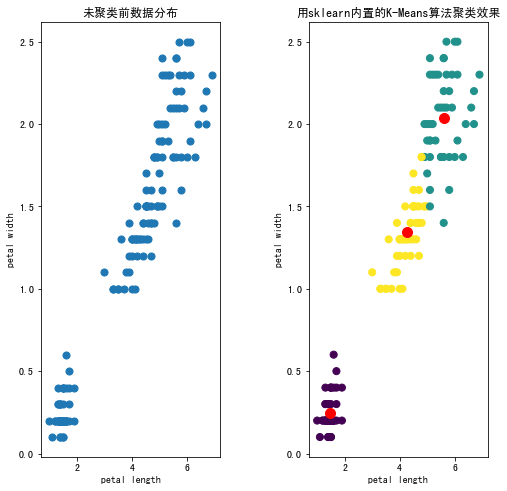

In [5]:
import time 
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
matplotlib.rcParams['font.sans-serif']=[u'SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
iris = load_iris()
X = iris.data[:,2:]
k = 3
s = time.time()
km = KMeans(n_clusters=k)
km.fit(X)
print(time.time()-s)
label_pred = km.labels_
centorids = km.cluster_centers_
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.scatter(X[:,0],X[:,1],s=50)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('未聚类前数据分布')
plt.subplots_adjust(wspace=0.5)

plt.subplot(122)
plt.scatter(X[:,0],X[:,1],c=label_pred,s=50,cmap='viridis')
plt.scatter(centorids[:,0],centorids[:,1],c='red',marker='o',s=100)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('用sklearn内置的K-Means算法聚类效果')
plt.show()

In [9]:
import numpy as np
def distEclud(veca,vecb):
    return np.sqrt(np.sum(np.power(veca-vecb,2)))

def randCent(dataSet,k):
    n = dataSet.shape[-1]
    centroids = np.mat(np.zeros((k,n)))
    for j in range(n):
        minJ = np.min(dataSet[:,j])
        rangeJ = np.float(np.max(dataSet[:,j])-minJ)
        centroids[:,j] = minJ + rangeJ*np.random.rand(k,1)
    return centroids
def kMeans(dataSet,k,distMena= distEclud,creatCent = randCent):
    m = dataSet.shape[0]
    clusterAssment = np.mat(np.zeros((m,2)))
    centroids = creatCent(dataSet,k)
    clusterChanged = False
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = np.inf
            minIndex = -1
            for j in range(k):
                distJI  = distMena(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI
                    minIndex=j
            if clusterAssment[i,0]!=minIndex:
                clusterChanged = True
            clusterAssment[i,:]= minIndex,minDist**2
        print(centroids)
        for cent in range(k):
            ptsClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]
            centroids[cent,:] = np.mean(ptsClust,axis=0)
    return centroids,clusterAssment
            

In [17]:
np.mat(np.zeros((3,10)))

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
import time
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['font.sans-serif']=[u'SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
def disEclud(vecA,vecB):
    return np.sqrt(np.sum(np.power(vecA-vecB,2)))
def randCent(dataSet,k):
    n = dataSet.shape[1]
    centroids = np.mat(np.zeros((k,n)))
    for  j in range(n):
        minJ = np.min(dataSet[:,j])
        rangeJ = np.float(np.max(dataSet[:,j])-minJ)
        centroids[:,j]=minJ + rangeJ*np.random.rand(k,1)
    return centroids
def kMeans(dataSet,k,distMeas = disEclud,createCent=randCent):
    m = dataSet.shape[0]
    clusterAssment = np.mat(np.zeros((m,2)))
    centroids = createCent(dataSet,k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged=False
        for i in range(m):
            minDist = np.inf
            minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI<minDist:
                    minDist = distJI
                    minIndex = j
                if clusterAssment[i,0]!= minIndex:
                    clusterChanged=True
                clusterAssment[i,:]=minIndex,minDist**2
            print(centroids)
        for cent in range(k):
            ptsClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]
            centroids[cent,:]= np.mean(ptsClust,axis=0)
    return centroids,clusterAssment
def biKmeans(dataSet,k,distMeas=disEclud):
    m = dataSet.shape[0]
    clusterAssment = np.mat(np.zeros((m,2)))
    centorid0 = np.mean(dataSet,axis=0).tolist()[0]
    centList = [centorid0]
    for j in range(m):
        clusterAssment[j,1]=distMeas(np.mat(centorid0),dataSet[j,:])**2
    while (len(centList)<k):
        lowestSSE = np.inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[np.nonzero(clusterAssment[:,0].A==i)[0],:]
            centoridMat, splitClustAss = kMeans(ptsInCurrCluster,2,distMeas)
            sseSplit=sum(splitClustAss[:,1])
            sseNotSplit = sum(clusterAssment[np.nonzero(clusterAssment[:,0].A!=i),1])
            if (sseNotSplit+sseSplit)<lowestSSE:
                bestCentToSplit = i
                bestNewCents = centoridMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseNotSplit+sseSplit
        bestClustAss[np.nonzero(bestClustAss[:,0].A==1)[0],0]=len(centList)
        bestClustAss[np.nonzero(bestClustAss[:,0].A==0)[0],0]=bestCentToSpli
        print('the bestCentTosplit is : ',bestCentToSplit)
        print('the len of bestClustAss is:',len(bestClustAss))
        centList[bestCentToSplit]=bestNewCents[0,:]
    return centList,clusterAssment
def load_data_make_blobs():
    from sklearn.datasets import make_blobs
    k = 5
    X,Y = make_blobs(n_samples=1000,n_features=2,centers=k,random_state=1)
    return X,k

In [17]:
import requests

def addressToLocation(address):
    # 在高德地图开发者平台（https://lbs.amap.com/）申请的key，需要替换为自己的key
    parameters = {
                    'key': '0610416f549978a9ce5017dab6195a5a',
                    'address': address,
                 }
    base = 'http://restapi.amap.com/v3/geocode/geo?'
    contest = requests.get(base,parameters).json()
    print(contest)
    location = ''
    return location

if __name__ == '__main__':
    print(addressToLocation("北京西站"))

{'info': 'INVALID_REQUEST', 'infocode': '10026', 'status': '0', 'sec_code_debug': 'd41d8cd98f00b204e9800998ecf8427e', 'key': '0610416f549978a9ce5017dab6195a5a', 'sec_code': 'd41d8cd98f00b204e9800998ecf8427e'}

